<a href="https://colab.research.google.com/github/Alireza-Amani/SVS/blob/master/SVS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INCOMPLETE**

**Soil, Vegetation, and Snow**


 \\
 \\
 \\
 \\



 



# Tools

**allow local connection**

In [ ]:
# run this line in terminal
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --NotebookApp.port_retries=0 --notebook-dir="" --no-browser --allow-root --NotebookApp.token='' --NotebookApp.disable_check_xsrf=True --port=8888

# then connect to the local server up there in the right. 


SyntaxError: ignored

In [1]:
# tools 

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import stats as st
import plotly.graph_objects as go
from plotly.offline import iplot
import xarray as xr
import shutil

from matplotlib import style
from matplotlib import rcParams

style.use("seaborn-white")

rcParams['figure.figsize'] = [15, 9]
rcParams['font.size'] = 24
rcParams['font.weight'] = 'bold'
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.labelsize'] = 18
rcParams['axes.labelweight'] = 'bold'

from os import chdir, mkdir

path_1 = '/Users/alireza_amani/Google Drive/svs/r1618_vv'
path_2 = '/Users/alireza_amani/Google Drive/svs/my_way'
path_3 = "/Users/alireza_amani/Google Drive/svs/Dan_/r1694"
path_4 = "/Users/alireza_amani/Google Drive/svs/Dan_/my_way"

chdir("/Users/alireza_amani/Google Drive/Colab Notebooks")
from font_output import increase_font, font
increase_font()
font()

from joblib import load, dump

from sklearn.ensemble import RandomForestRegressor

import rpy2
%reload_ext rpy2.ipython
%cd /Users/alireza_amani/Google Drive/svs/my_way
%config InlineBackend.figure_format = 'retina'
%xmode Verbose


# custome-made Functions 

def list2str(my_lists, f=None, new_line = True):

  '''
  'Give me your lists, I ll give you my worlds' George C. Scotch

  '''

  num_lists = len(my_lists)


  space = 5*' '
  nl = '\n'
  tab = '\t'
  string = ''

  for l1 in range(num_lists):
    L = len(my_lists[l1])

    for i1 in range(L):

      if f == 'e':
        string += f"{my_lists[l1][i1] : .3e}" + space   
      elif f == 'f':
        string += f"{my_lists[l1][i1] : .3e}" + space
      elif f == 'd':
        string += f"{int(my_lists[l1][i1]) : d}" + space

      elif f ==None:
        string += f"{my_lists[l1][i1]}" + space
      else:
        print('''Please choose between "e", "f", and "d" ''')

    string +=  tab  
  
    
  
  string = string[:-5]
  string += (nl * new_line)

  return string


# a function to ... 
def assist_print(field="", value="", comment="", com_only=False, special=False, sep=1,
                 com_sign="!", prnt=False):

  sp = " "
  nl = "\n"
  if (not com_only) & (not special):
    
    l = len(field)
    l2 = len(str(value))
    line = field + (24 - l)*sp + str(value) 
    line += (10 - l2)*sp + com_sign + comment + nl*sep

    

  elif (com_only) & (not special):
    line = com_sign + comment + nl*sep

  elif (special) & (not com_only):
   
    l = len(field)
    l2 = len(list2str([value], new_line=False))
    line = field + (24 - l)*sp + list2str([value], new_line=False)
    line += (l2//6)*sp + com_sign + comment + nl*sep

  lines.append(line)
  if prnt:
    print(lines)



print( "All done Ali")


<IPython.core.display.Javascript object>

/Users/alireza_amani/Google Drive/svs/my_way
Exception reporting mode: Verbose
All done Ali


In [ ]:
%%R
skewness(c(1, 2, 3, 4))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[1] 0


#  

 \\
 \\
 \\
 \\


 



# SVS


## A class for SVS

In [ ]:
# check if all the files are there

class SVS:
  
  
  def __init__(self):
    from subprocess import run, PIPE, STDOUT
    
    ## checking if all files are there --------------
    files = (subprocess.run("ls", text=True, check=True, stdout=PIPE, stderr=STDOUT).
            stdout.splitlines())
    f1 = "MESH_input_run_options.ini"
    f2 = "MESH_input_soil_levels.txt"
    f3 = "MESH_parameters.txt"
    f4 = "basin_forcing.met"
    f5 = "sa_mesh"
    
    self.flag = False
    if f1 not in files:
      self.error = (f"{f1} is not in the current directory; it must be!")
    elif f2 not in files:
      self.error = (f"{f2} is not in the current directory; it must be!")
    elif f3 not in files:
      self.error = (f"{f3} is not in the current directory; it must be!")
    elif f4 not in files:
      self.error = (f"{f4} is not in the current directory; it must be!")
    elif f5 not in files:
      self.error = (f"{f5} is not in the current directory; it must be!")
    elif len(files) != 6:
      self.error = ("You need to have an output folder for SVS in the current directory; currently you dont!")
    else: 
      self.flag = True

    if not self.flag:
      raise FileNotFoundError(f"{self.error}.\n Also play some Frank Sinatra to get the most out of your life.")

    ## ------------------------




  def run(self):
    
    report = subprocess.run("./sa_mesh", text=True, check=False, stdout=PIPE, stderr=STDOUT)

    if report.stderr is not  None :
      print(report.stderr)
    else:
      print(report.stdout)

  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
svs = SVS()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%time
svs.run()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 MESH 1.4 ---  (1694)
 
 READING: MESH_input_run_options.ini
 Total number of grids: 1
 Total number of grids inside the basin: 1
 Side length of grid: 1.00000 m
 Number of GRUs: 1
 Number of land-based tiles: 1
 Number of river classes: 0
 READING: MESH_input_soil_levels.txt
   Number of soil layers: 11
             Level   Thickness (m)      Bottom (m)
                 1    0.500000E-01    0.500000E-01
                 2    0.500000E-01    0.100000
                 3    0.500000E-01    0.150000
                 4    0.150000        0.300000
                 5    0.200000        0.500000
                 6    0.300000        0.800000
                 7    0.300000         1.10000
                 8    0.400000         1.50000
                 9    0.400000         1.90000
                10    0.100000         2.00000
                11    0.100000         2.10000
 READING: MESH_parameters.txt
   Reading parameter: deglat.
   Reading parameter: deglng.
   Reading parameter: observed_f

## Some notes

line 228 of file: "read_run_options.f90"   --- get rid of the 5 ! 

##   

 \\
 \\
 \\
 \\


 


## Documentation

Our site:  

Saint-Nicéphore
Drummondville, QC

lat: 45.82, lon: 287.63 (-72.37)


##  

 \\
 \\
 \\
 \\


 

## User Defined Parameters

In [ ]:
#

######## > about the location < ########

# latitude and logitude of the point in degree
latitude = 45.82  
longitude = -72.37



# reference height for momentum and temp-humidity -- unit : m 
ref_m = 10.0
ref_th = 2.0



######## > surface propoerties < ########

topo_slope = 0.02  # topographic slope % 
dr_den = 0     # drainage density m m^-2 




######## > about soil layers < ######## 

# the thickness of each layer - top to bottom 
layers_thickness =  [
                    0.05, 0.05, 0.05,
                    0.15, 0.20, 0.3, 0.3,
                    0.40, 0.4,
                    0.10, 
                    0.10
]

# Soil configuration
soil_map = "NIL"  # look in the detail section
perm_soils = 11 # Number of permeable soil layers for the water balance. "khyd"

# sand percentage in each soil layer
sand = [
        40, 40, 40, 
        50, 50, 50, 50, 
        30, 30, 
        100, 100
]        

# clay percentage in each soil layer
clay = [
        20, 20, 20, 
        20, 20, 20, 20, 
        30, 30, 
        0, 0
]  


# Liquid water content in the soil.	
soil_moist = [
              .06, .06, .06, 
              .09, .09, .09, .09, 
              .1, .1, 
              .05, .05
]   

0
# Soil temperature (index 1: skin temperature; index 2: mean) in Kelvin plz
soil_temp = [
             280, 280 
]




########   > about vegetation <   ######## 


# Active fraction for each vegetation type -- 26 types ugh 
active_veg = [
              0, 0, 0, 0, 0,
              0, 0, 0, 0, 0,
              0, 0, 1, 0, 0, 
              0, 0, 0, 0, 0, 
              0, 0, 0, 0, 0, 0, 
]

# Roughness height (provided by vegetation type)
rough_height = [
              0, 0, 0, 0, 0,
              0, 0, 0, 0, 0,
              0, 0, 0.082, 0, 0, 
              0, 0, 0, 0, 0, 
              0, 0, 0, 0, 0, 0, 
]


# Vegetation canopy temperature (index 1: skin temperature; index 2: mean). 
veg_temp = [
            280, 280
] 

# Liquid water retained in the vegetation canopy.	kg m^-2
veg_water = 0




########   > about snow <    ######## 


# Snow temperature over low-lying vegetation and bare ground (index 1: skin temperature; index 2: mean).	
snow_temp_low = [
              273, 273
]

# Snow temperature below high vegetation (index 1: skin temperature; index 2: mean).	
snow_temp_high = [
              273, 273
]

# Snow depth over low-lying vegetation and bare ground.	(m)
snow_depth = 0

# Snow depth below high vegetation.	
snow_depth_high = 0

# Snow density over low-lying vegetation and bare ground.	kg / m3 
snow_dens_low = 0

# Snow density below high vegetation.
snow_dens_high = 0

# Snow albedo over low-lying vegetation and bare ground.	
snow_albedo_low = 0

# Snow albedo beloz high vegetation.	
snow_albedo_high = 0


# Liquid water retained in the snowpack for low-lying vegetation and bare ground.	kg / m2 
snow_water_low = 0 

# Liquid water retained in the snowpack below high vegetation.	
snow_water_high = 0









### > some details < ###

'''
"OBSERVED_FORCING" should be specified as "height" for observatory data that come 
from site instrumentation. However, "OBSERVED_FORCING" is still allowed to be "sigma" 
with respective sigma levels in point mode, if relevant for the forcing files. For example, 
if these data are point time-series extracted from numerical weather prediction model outputs.
---> change it in the below section if you want! 



About the soil_map or soiltex:
...Specifies the soils database for mapping soils information. Must be one of 
"GSDE", "SLC", "SOILGRIDS", or "NIL". 
Set to "NIL" to use the "SAND" and "CLAY" values as read from the file, without re-mapping.

Vegetation types
SVS has 26 distinct vegetation types defined within itself. 

 ----- 1 ----- 2 ----- 3 ----- 4 ----- 5       ----- 6 ----- 7 ----- 8 ----- 9   ---- 10 
     deci-nl  deci-bl  trop-bl  dry-tr ever-sh        sea   glacier in-lake   ever-nl  ever-bl 
                                                
    
--- 11   ---- 12   ---- 13  ---- 14   ---- 15     --- 16 ---- 17 ---- 18 ---- 19 ---- 20 
  deci-sh   thor-sh  shor-gr   long-gr   crops       rice   sugar   maize  cotton  irr-cr   

---- 21 ---- 22 ---- 23 ---- 24 ---- 25 ---- 26  
   urban  tundra   swamp  desert  mx-tree   mx-sh 



''';








###          > Authorized Personnel Only <          ### 



# creating the "MESH_input_soil_levels.txt"
 
cum_depth = []
number_of_layers = len(layers_thickness)

for i1 in range(number_of_layers):
  cum_depth.insert(i1, np.sum(layers_thickness[:i1+1]))

cum_depth = np.round(cum_depth, 2)

chdir(path_4)
with open("MESH_input_soil_levels.txt", "w") as file:
  for i2 in range(number_of_layers):

    line = f"{layers_thickness[i2] : .2f}" + "\t" + f"{cum_depth[i2] : .2f}" + "\n"

    file.write(line)


# creating the "MESH_parameters.txt"

nl = "\n"
sp = " "
lines = []

assist_print(com_only=True, 
             comment="TXT (free-format) MESH configuration file", sep=4)



assist_print(com_only=True, comment="Basin information")
assist_print("deglat", latitude, "latitude of the point in degree")
assist_print("deglng", longitude, "longitude of the point in degree", sep=3)


assist_print(com_only=True, comment="Forcing configuration")
observed_forcing = "height"
assist_print("observed_forcing", observed_forcing, 
             'Specifies the type of driving data. Must be one of "sigma" or "height"')
assist_print("zusl", ref_m, "Reference level of forcing data for momentum (m)")
assist_print("ztsl", ref_th, "Reference height of forcing data for temperature and humidity	(m)", sep=3)


assist_print(com_only=True, comment="Physiographic characteristics")
assist_print("slop", topo_slope, "topographic slope %")
assist_print("draindens", dr_den, "drainage density m m^-2", sep=3)


assist_print(com_only=True, comment="Soils configuration")
assist_print("soiltext", soil_map, "NIL: required to use soil_levels.txt as-is")
assist_print("khyd", perm_soils, "Number of permeable soil layers for the water balance.")
assist_print("sand", sand, "sand content %", special=True)
assist_print("clay", clay, "clay content %", special=True)
assist_print("wsoil", soil_moist, "Liquid water content in the soil m3/m3", special=True, sep=3)


assist_print(com_only=True, comment="Vegetation canopies")
assist_print("vf", active_veg, "Active fraction for each vegetation type", special=True)
assist_print("z0", rough_height, "Roughness height (provided by vegetation type)",
             special=True, sep=3)


assist_print(com_only=True, comment="Initial conditions (prognostic variables)")
assist_print("tground", soil_temp, "Soil temperature (index 1: skin temperature; index 2: mean)", special=True)
assist_print("tvege", veg_temp, "Vegetation canopy temperature (index 1: skin temperature; index 2: mean)", special=True)
assist_print("tsnow", snow_temp_low, 
             "Snow temperature over low-lying vegetation and bare ground (index 1: skin temperature; index 2: mean).", special=True)
assist_print("tsnowveg", snow_temp_high,
             "Snow temperature below high vegetation (index 1: skin temperature; index 2: mean)", special=True, sep=2)

assist_print("wveg", veg_water, "Liquid water retained in the vegetation canopy.")
assist_print("snodpl", snow_depth, "Snow depth over low-lying vegetation and bare ground.")
assist_print("snvdp", snow_depth, "Snow depth over high vegetation")
assist_print("snoden", snow_dens_low, "Snow density over low-lying vegetation and bare ground.	")
assist_print("snvden", snow_dens_high, "Snow density over high vegetation")
assist_print("snoal", snow_albedo_low, "Snow albedo over low-lying vegetation and bare ground.	")
assist_print("snval", snow_albedo_high, "Snow albedo over high vegetation")
assist_print("wsnow", snow_water_low, "Liquid water retained in the snowpack for low-lying vegetation and bare ground")
assist_print("wsnv", snow_water_high, "Liquid water retained in the snowpack for high vegetation")



# writing into a text file 
chdir(path_4)
with open("MESH_parameters.txt", "w") as file:
  
  while lines:
    line = lines.pop(0)
    file.write(line)





<IPython.core.display.Javascript object>

In [ ]:
!pwd

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/Users/alireza_amani/Google Drive/svs/Dan_/my_way


##  

 \\
 \\
 \\
 \\


 

## User Defined Options

In [ ]:
# 

# add the control flags and the corresponding options 

flag_1 = "BASINFORCINGFLAG"

# options for BASINFORCINGFLAG
exten = "met" # extension of the forcing file 
start_date = "2018090107"  # YYYYMMDDHH
period_length = 60 # length of each record in the forcing files in minutes
rain_snow = "rr_sr" # adding this option would require the .met file to have two extra columns in the end 
#                      these two are the rate of rainfall and snowfall in the written order. 



flag_2 = "SHDFILEFLAG"
option_SHD = 2  # it should be 2 for activating the point_mode in SVS



flag_3 = "INPUTPARAMSFORMFLAG"
option_input_1 = "only" # The "only" option on INPUTPARAMSFORMFLAG prevents MESH from searching for the INI format parameter files.
option_input_2 = "txt" # The "txt" option on INPUTPARAMSFORMFLAG tells MESH to read the MESH_parameters.txt input file.


flag_4 = "SOILINIFLAG"
option_soilinflag = 3 # SOILINIFLAG can be configured to optionally redistribute soil texture 
#                       parameters when their sum adds to greater than 100% of the soil triangle.


flag_5 = "NRSOILAYEREADFLAG"
option_nrsoil = 1 #number_of_layers # To parameterize and initialize all layers explicitly, this flag can be removed or the option should be set to zero.


flag_6 = "RUNMODE"
option_runmode_1 = "noroute" # To run in point mode, RUNMODE must include the "noroute" option to disable distributed routing routines, which require additional hydrological attributes and basin information not included in the subset of input files used for "point mode".
option_runmode_2 = "runsvs" # To activate SVS, RUNMODE must include the "runsvs" option, or MESH will run with the default Canadian Land Surface Scheme (CLASS) instead.


flag_7 = "DIAGNOSEMODE" 
option_diag = "on" # DIAGNOSEMODE can be optionally activated to print additional diagnostic information during the initialization of the model to screen and to MESH_output_echo_print.txt.
#                     The option can be disabled by changing the setting from "on" to "off".


flag_8 = "TIMESTEPFLAG"
option_timestep = 5 # TIMESTEPFLAG specifies the time-step in minutes used by the land surface scheme, in this case of SVS. In point mode, as this is the only process-based module active in the model, TIMESTEPFLAG defines the model time-step.


number_of_flags = 8

# Name of output folder
out_folder = "test_svs"    

# Number of output grid points
output_points = 0

# Grid number
grid_no = 1

# Land class
land_class = 1







###          > Authorized Personnel Only <          ### 

sp = " "
nl = "\n"
lines = []

assist_print(com_only=True, comment="MESH run options input file", com_sign="#")
assist_print(com_only=True, comment="##### Control Flags #####",  com_sign="#")
assist_print(com_only=True, comment="----#", com_sign="#")

assist_print(4*sp + str(number_of_flags), "",
             "# Number of control flags" , com_sign="#")

assist_print(flag_1, 
             [exten, rain_snow, f"hf={period_length}", 
              f"start_date={start_date}"], special=True, com_sign=""
)

assist_print(
    flag_2, option_SHD, com_sign=""
)

assist_print(
    flag_3, [option_input_1, option_input_2],
    com_sign="", special=True
)
assist_print(
    flag_4, option_soilinflag, com_sign=""
)
assist_print(
    flag_5, option_nrsoil, com_sign=""
)
assist_print(
    flag_6, [option_runmode_1, option_runmode_2],
    com_sign="", special=True
)
assist_print(
    flag_7, option_diag, com_sign=""
)

assist_print(
    flag_8, option_timestep, com_sign=""
)

assist_print(com_only=True,
             comment="\n",
             com_sign="")

assist_print(4*sp + str(output_points), "",
             "Number of output points" , com_sign="#", sep=2)

assist_print(str(grid_no), "",
             "Grid Number" , com_sign="#")
assist_print(str(land_class), "",
             "Land Class" , com_sign="#")
assist_print(out_folder, "",
             "Output folder name" , com_sign="#", sep=3)

assist_print(out_folder, "",
             "Output directory for total-basin files" , com_sign="#")


assist_print(com_only=True, comment="Simulation Run Times", com_sign="#")
assist_print(com_only=True, comment=" ", com_sign="#")

startt_date = [0, 0, 0, 0]
endd_date = [0, 0, 0, 0]

assist_print(
    "", startt_date,
    com_sign="", special=True
)
assist_print(
    "", endd_date,
    com_sign="", special=True
)





# creating the file
chdir(path_4)
mkdir(out_folder)
with open("MESH_input_run_options.ini", "w") as file:
  
  while lines:
    line = lines.pop(0)
    file.write(line)





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
number_of_layers


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

11

In [ ]:
lines=[]
assist_print(
    "", [endd_date, startt_date],
    com_sign="", special=True, prnt=True
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['                        [0, 0, 0, 0]     [0, 0, 0, 0]      \n']


##  

 \\
 \\
 \\
 \\


 

# 2. Preprocessing

### procedures

In [2]:

chdir("/Users/alireza_amani/Google Drive/svs")
ds = xr.open_dataset('data.nc')
df = ds.isel(rlat=1, rlon=0).to_dataframe()
ds = ds.isel(rlat=1, rlon=0)


<IPython.core.display.Javascript object>

In [3]:
t = pd.DatetimeIndex(ds.time.values[:])



df = pd.DataFrame({'Hour' : t.hour, 
                   'Minute' : t.minute,
                   'DoY' : t.dayofyear,
                   'Year' : t.year,
                   'Shortwave radiation(W/m2)' : ds.FB,
                   'Longwave radiation(W/m2)' : ds.FI,
                   'Precipitation(mm/s)' : ds.PR_Capa/3600,
                   'Air Temperature(Deg C)' : ds.TT,
                   'Specific Humidity(kg/kg)' : ds.HU,
                   'Wind Speed(m/s)' : ds.UV,
                   'Air Pressure(Pa)' : ds.P0 * 100
                   
    })

#


df[['Hour', 'Minute', 'DoY', 'Year']] = df[['Hour', 'Minute', 'DoY', 'Year']].astype(int)
np.savetxt('A.met', df.values, fmt='%d' )
df.iloc[2000]

<IPython.core.display.Javascript object>

Hour                             15.000000
Minute                            0.000000
DoY                             327.000000
Year                           2018.000000
Shortwave radiation(W/m2)       339.750000
Longwave radiation(W/m2)        167.521240
Precipitation(mm/s)               0.000001
Air Temperature(Deg C)          -14.244324
Specific Humidity(kg/kg)          0.000960
Wind Speed(m/s)                   2.145811
Air Pressure(Pa)             102218.179688
Name: 2000, dtype: float64

In [4]:

df['Rain rate mm/s'] = (df['Air Temperature(Deg C)'] >= 0).astype(int) * df['Precipitation(mm/s)']
df['Snow rate mm/s'] = (df['Air Temperature(Deg C)'] < 0).astype(int) * df['Precipitation(mm/s)']


<IPython.core.display.Javascript object>

In [19]:
%R options(repr.plot.width = 24, repr.plot.height = 8);


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R[write to console]: No id variables; using all as measure variables



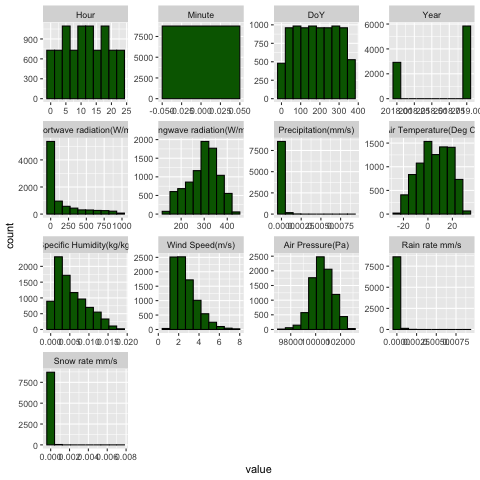

In [20]:
%%R
melted <- melt(df)



ggplot(data = melted) + 
geom_histogram(
    mapping = aes(x=value), fill="DarkGreen", color="Black", bins=10
)+
facet_wrap(~variable, scales="free")


In [ ]:
chdir(path_4)
with open("basin_forcing.met", 'w') as f:
    f.write(df.to_string(header = False, index = False))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#   

 \\
 \\
 \\
 \\


 \\
 \\
 \\
 \\
 
---


# Compiling the `makefile` 

In [ ]:
from os import chdir

path_1 = '/Users/alireza_amani/Google Drive/svs/r1618_vv'
path_2 = '/Users/alireza_amani/Google Drive/svs/my_way'
path_3 = "/Users/alireza_amani/Google Drive/svs/Dan_/r1694"
path_4 = "/Users/alireza_amani/Google Drive/svs/Dan_/my_way"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
chdir(path_3)
#make gfortran -- and then copy it to path 2  
!make 
original = path_3
target = path_4
shutil.copyfile(original, target)

In [ ]:
subprocess.check_output("pdwd", text=True)

In [ ]:
p1 = subprocess.run('./sa_mesh', capture_output=True, shell=True, text=True, check=True)
print(p1)

In [ ]:
print(p1.stdout)

In [ ]:
import subprocess

In [ ]:
%%timeit
chdir(path_4)
!./sa_mesh

<IPython.core.display.Javascript object>

Streaming output truncated to the last 5000 lines.
  2019  92     0.004     1.577     3.797
  2019  93     0.399     1.583     5.774
  2019  94     1.035     2.122     7.621
  2019  95     0.001     1.527     8.273
  2019  96     2.803     0.493     7.913
  2019  97     0.022     1.016     7.151
  2019  98    25.645     0.431     6.378
  2019  99    72.448     0.238     5.708
  2019 100     8.335     0.869     5.144
  2019 101     0.009     1.034     4.687
  2019 102     0.002     0.986     4.357
  2019 103     0.504     1.436     4.135
  2019 104     0.292     1.261     4.005
  2019 105    12.247     0.718     4.303
  2019 106     0.764     1.400     8.912
  2019 107     0.000     2.329    17.633
  2019 108     0.016     1.036    15.202
  2019 109    10.402     0.381    11.816
  2019 110    38.989     0.657     9.470
  2019 111     0.008     2.732     8.733
  2019 112     0.000     2.519    10.338
  2019 113     0.001     3.054    10.654
  2019 114    12.263     0.782     9.433
  2019

In [ ]:
chdir(path_4)
!./sa_mesh

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 MESH 1.4 ---  (1694)
 
 READING: MESH_input_run_options.ini
 Total number of grids: 1
 Total number of grids inside the basin: 1
 Side length of grid: 1.00000 m
 Number of GRUs: 1
 Number of land-based tiles: 1
 Number of river classes: 0
 READING: MESH_input_soil_levels.txt
   Number of soil layers: 11
             Level   Thickness (m)      Bottom (m)
                 1    0.500000E-01    0.500000E-01
                 2    0.500000E-01    0.100000
                 3    0.500000E-01    0.150000
                 4    0.150000        0.300000
                 5    0.200000        0.500000
                 6    0.300000        0.800000
                 7    0.300000         1.10000
                 8    0.400000         1.50000
                 9    0.400000         1.90000
                10    0.100000         2.00000
                11    0.100000         2.10000
 READING: MESH_parameters.txt
   Reading parameter: deglat.
   Reading parameter: deglng.
   Reading parameter: observed_f

In [ ]:
509 + 359 - 29

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

839

#   

 \\
 \\
 \\
 \\


 \\
 \\
 \\
 \\
 
---


# Outputing 

In [ ]:
input_out_folder

<IPython.core.display.Javascript object>

'test_svs  #3 Output directory\n'

In [ ]:
%cd test_svs
!ls
chdir(path_2)


<IPython.core.display.Javascript object>

/Users/alireza_amani/Google Drive/svs/my_way/test_svs
Basin_average_energy_balance.csv  ok_MESH_output_echo_print.txt
Basin_average_water_balance.csv   sa_mesh
MESH_input_run_options.ini        svs1_out_watbal_hourly.csv
MESH_output_echo_print.txt        svs1_out_wsoil_hourly.csv
basin_forcing.met                 svs1_snow_hourly.csv
not_ok_MESH_output_echo_print.txt


In [ ]:
water_balance = pd.read_csv("test_svs/svs1_out_wsoil_hourly.csv")
water_balance
water_balance.columns = water_balance.columns.str.strip()
water_balance.columns

<IPython.core.display.Javascript object>

Index(['YEAR', 'DAY', 'HOUR', 'WG1', 'WG2', 'WG3', 'WG4', 'WG5', 'WG6', 'WG7',
       'Unnamed: 10'],
      dtype='object')

In [ ]:
pd.Period()

<IPython.core.display.Javascript object>

NaT

In [ ]:
water_balance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,YEAR,DAY,HOUR,WG1,WG2,WG3,WG4,WG5,WG6,WG7,Unnamed: 10
0,2018,244,7,0.100029,0.199995,0.20000,0.2,0.2,0.0,0.0,NaN
1,2018,244,8,0.100067,0.199992,0.20000,0.2,0.2,0.0,0.0,NaN
2,2018,244,9,0.100127,0.199989,0.20000,0.2,0.2,0.0,0.0,NaN
3,2018,244,10,0.100155,0.199986,0.20000,0.2,0.2,0.0,0.0,NaN
4,2018,244,11,0.100160,0.199981,0.20000,0.2,0.2,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
411,2018,261,10,0.149751,0.194964,0.19995,0.2,0.2,0.0,0.0,NaN
412,2018,261,11,0.149814,0.194960,0.19995,0.2,0.2,0.0,0.0,NaN
413,2018,261,12,0.149791,0.194946,0.19995,0.2,0.2,0.0,0.0,NaN
414,2018,261,13,0.149780,0.194926,0.19995,0.2,0.2,0.0,0.0,NaN
